<!-- import pkg -->

In [6]:
import pandas as pd
import numpy as np
import plotly
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,download_plotlyjs,iplot,plot
%matplotlib inline

<!-- jupyter offline setup -->

In [8]:
init_notebook_mode(connected=True)
cf.go_offline()

<!-- import data -->

In [9]:
df = pd.read_csv('PUBG.csv')

<!-- data cleansing -->

In [10]:
df2 = df.apply(pd.to_numeric, errors='ignore')
df_solo = df2[['player_name','solo_RoundsPlayed','solo_Wins']].head(20)
df_duo = df2[['player_name','duo_RoundsPlayed','duo_Wins']].head(20)
df_squad = df2[['player_name','squad_RoundsPlayed','squad_Wins']].head(20)
wins = df2[['player_name','solo_WinRatio','duo_WinRatio','squad_WinRatio']].head(20)


In [11]:
df.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


<!-- solo player viz  -->

In [12]:
df_solo.head()

,player_name,solo_RoundsPlayed,solo_Wins
0,BreakNeck,17,3
1,Blackwalk,33,6
2,mercedes_benz,5,0
3,DORA,8,4
4,n2tstar,6,2


In [13]:
df_duo.head()

,player_name,duo_RoundsPlayed,duo_Wins
0,BreakNeck,15,5
1,Blackwalk,14,5
2,mercedes_benz,17,6
3,DORA,3,2
4,n2tstar,105,27


In [14]:
df_squad.head()

,player_name,squad_RoundsPlayed,squad_Wins
0,BreakNeck,642,305
1,Blackwalk,722,338
2,mercedes_benz,733,347
3,DORA,491,207
4,n2tstar,416,193


In [15]:
wins.head()

,player_name,solo_WinRatio,duo_WinRatio,squad_WinRatio
0,BreakNeck,17.65,33.33,47.51
1,Blackwalk,18.18,35.71,46.81
2,mercedes_benz,0.00,35.29,47.34
3,DORA,50.00,66.67,42.16
4,n2tstar,33.33,25.71,46.39


In [17]:
fig = go.Figure(data = [
                        go.Bar(name='Wins',x = df_solo['player_name'],y = df_solo['solo_Wins'], marker_color='indianred'),
                        go.Bar(name='Rounds',x = df_solo['player_name'],y = df_solo['solo_RoundsPlayed'], marker_color='lightsalmon' )
])

fig.update_layout(barmode='group', title_text='Solo Wins Rounds')
fig.show()

<!-- duo player viz  -->

In [18]:
fig = go.Figure(data = [
                        go.Bar(name='Wins',x = df_duo['player_name'],y = df_duo['duo_Wins'], marker_color='indianred'),
                        go.Bar(name='Rounds',x = df_duo['player_name'],y = df_duo['duo_RoundsPlayed'], marker_color='lightsalmon' )
])

fig.update_layout(barmode='group', title_text='Duo Wins Rounds')
fig.show()

<!-- squad player viz -->

In [19]:
fig = go.Figure(data = [
                        go.Bar(name='Wins',x = df_squad['player_name'],y = df_squad['squad_Wins'], marker_color='indianred'),
                        go.Bar(name='Rounds',x = df_squad['player_name'],y = df_squad['squad_RoundsPlayed'], marker_color='lightsalmon' )
])

fig.update_layout(barmode='group', title_text='Squad Wins Rounds')
fig.show()

<!-- K-Means Clustering -->

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
wins.head()

,player_name,solo_WinRatio,duo_WinRatio,squad_WinRatio
0,BreakNeck,17.65,33.33,47.51
1,Blackwalk,18.18,35.71,46.81
2,mercedes_benz,0.00,35.29,47.34
3,DORA,50.00,66.67,42.16
4,n2tstar,33.33,25.71,46.39


In [15]:
wins_x = wins.iloc[:,1:4]
wins_x.head()

,solo_WinRatio,duo_WinRatio,squad_WinRatio
0,17.65,33.33,47.51
1,18.18,35.71,46.81
2,0.00,35.29,47.34
3,50.00,66.67,42.16
4,33.33,25.71,46.39


In [16]:
x_array = np.array(wins_x)
x_array

array([[17.65, 33.33, 47.51],
       [18.18, 35.71, 46.81],
       [ 0.  , 35.29, 47.34],
       [50.  , 66.67, 42.16],
       [33.33, 25.71, 46.39],
       [31.25, 14.67, 32.1 ],
       [ 8.45, 23.31, 33.  ],
       [26.32, 18.52, 30.32],
       [13.64, 13.64, 32.89],
       [25.  , 17.65, 34.83],
       [ 6.03, 11.46, 27.44],
       [ 1.19,  3.19, 18.5 ],
       [10.34, 24.49, 27.42],
       [ 5.56, 12.82, 27.52],
       [13.04, 21.48, 39.78],
       [33.33, 28.57, 44.41],
       [23.03, 33.33, 41.  ],
       [18.46, 32.47, 35.21],
       [37.5 , 21.5 , 37.94],
       [ 4.44,  3.51, 17.91]])

In [17]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.353     , 0.47479521, 1.        ],
       [0.3636    , 0.51228733, 0.97635135],
       [0.        , 0.50567108, 0.99425676],
       [1.        , 1.        , 0.81925676],
       [0.6666    , 0.3547574 , 0.96216216],
       [0.625     , 0.18084436, 0.47939189],
       [0.169     , 0.31695022, 0.5097973 ],
       [0.5264    , 0.24149338, 0.41925676],
       [0.2728    , 0.16461878, 0.50608108],
       [0.5       , 0.22778828, 0.57162162],
       [0.1206    , 0.13027725, 0.32195946],
       [0.0238    , 0.        , 0.01993243],
       [0.2068    , 0.33553875, 0.32128378],
       [0.1112    , 0.15170132, 0.32466216],
       [0.2608    , 0.28812224, 0.73885135],
       [0.6666    , 0.39981096, 0.89527027],
       [0.4606    , 0.47479521, 0.78006757],
       [0.3692    , 0.46124764, 0.58445946],
       [0.75      , 0.2884373 , 0.67668919],
       [0.0888    , 0.00504096, 0.        ]])

<!-- menentukan cluster -->


In [18]:
kmeans = KMeans(n_clusters = 3, random_state = 100)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=100)

In [19]:
kmeans.cluster_centers_

array([[0.189925  , 0.16820258, 0.30287162],
       [0.45594545, 0.37895973, 0.78719287],
       [1.        , 1.        , 0.81925676]])

In [20]:
print(kmeans.labels_)

[1 1 1 2 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0]


In [21]:
wins['clusters'] = kmeans.labels_

In [22]:
wins

,player_name,solo_WinRatio,duo_WinRatio,squad_WinRatio,clusters
0,BreakNeck,17.65,33.33,47.51,1
1,Blackwalk,18.18,35.71,46.81,1
2,mercedes_benz,0.00,35.29,47.34,1
3,DORA,50.00,66.67,42.16,2
4,n2tstar,33.33,25.71,46.39,1
5,coldoxygen,31.25,14.67,32.10,1
6,Giken,8.45,23.31,33.00,0
7,KoreaNo1,26.32,18.52,30.32,0
8,undor,13.64,13.64,32.89,0
9,Fordune,25.00,17.65,34.83,1


<!-- memvizualisasikan hasil cluster -->

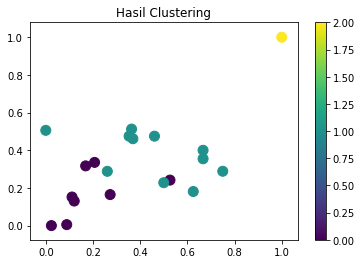

In [23]:
output = plt.scatter(x_scaled[:,0],
                     x_scaled[:,1],
                     s = 100,
                     c = wins.clusters,
                     marker = 'o',
                     alpha = 1)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],
            centers[:,1],
            c = 'red',
            s = 100,
            alpha = 0,
            marker = 's')

plt.title('Hasil Clustering')
plt.colorbar(output)

            

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                          x = wins['clusters'] == 0,
                          y = wins['player_name'],
                          marker=dict(color='purple',size=13),
                          mode='markers',
                          name='cluster 0'
))


fig.add_trace(go.Scatter(
                          x = wins['clusters']== 1,
                          y = wins['player_name'],
                          marker=dict(color='darkseagreen', size = 12),
                          mode='markers',
                          name='cluster 1'
))


fig.add_trace(go.Scatter(
                          x = wins['clusters']== 2,
                          y = wins['player_name'],
                          marker=dict(color='gold', size = 12),
                          mode='markers',
                          name='cluster 2'
))

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                          x = wins['solo_WinRatio'],
                          y = wins['player_name'],
                          marker=dict(color='#EC5E64', size = 13),
                          mode = 'markers',
                          name = 'Solo'
))

fig.add_trace(go.Scatter(
                          x = wins['duo_WinRatio'],
                          y = wins['player_name'],
                          marker=dict(color='#9C5518', size = 13),
                          mode = 'markers',
                          name = 'Duo'
))

fig.add_trace(go.Scatter(
                          x = wins['squad_WinRatio'],
                          y = wins['player_name'],
                          marker=dict(color='#FFA41B', size = 13),
                          mode = 'markers',
                          name = 'Squad'
))

fig.show()

In [7]:
pwd

'C:\\Users\\mekel'

In [9]:
cd\

C:\


In [10]:
cd D:


D:\


In [11]:
D:\penulisan ilmiah

SyntaxError: unexpected character after line continuation character (<ipython-input-11-8a834bab1e24>, line 1)

In [4]:
pwd

'C:\\Users\\mekel'

In [5]:
cd D:\penulisan ilmiah

D:\penulisan ilmiah


In [20]:
df

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87893,SaikoMene,87710,1.05,0.00,48273.92,62,0,0.00,5,8.1,...,105321.37,211421.17,1863.11,1503.24,489.84,136,15,70,7285.37,41
87894,KARUKOR,22783,1.61,4.65,49006.75,43,2,0.22,9,20.9,...,98108.14,242154.75,1636.41,1590.67,235.24,143,26,72,14440.64,97
87895,Dertydann,178547,1.00,0.00,14272.20,16,0,0.00,1,6.2,...,177062.72,384254.27,2109.40,1088.12,453.87,157,24,95,15939.11,92
87896,Neferhor,126589,5.10,16.67,58518.86,48,8,0.44,18,37.5,...,523052.83,853232.16,1785.15,1804.51,449.91,397,39,317,56870.07,350


In [24]:
df_solo

,player_name,solo_RoundsPlayed,solo_Wins
0,BreakNeck,17,3
1,Blackwalk,33,6
2,mercedes_benz,5,0
3,DORA,8,4
4,n2tstar,6,2
5,coldoxygen,16,5
6,Giken,142,12
7,KoreaNo1,19,5
8,undor,44,6
9,Fordune,8,2
